In [53]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0'

Data Preparation and Load Data

In [54]:
weight = 0.6
bias = 2

X = torch.arange(start=0, end=100, step=0.001).unsqueeze(dim=1)
Y = weight * X + bias

print("Shape of X: ", X.shape,"Shape of Y: ",  Y.shape, )

for i in range(len(X[:10])):
    print(X[i], Y[i])

Shape of X:  torch.Size([100000, 1]) Shape of Y:  torch.Size([100000, 1])
tensor([0.]) tensor([2.])
tensor([0.0010]) tensor([2.0006])
tensor([0.0020]) tensor([2.0012])
tensor([0.0030]) tensor([2.0018])
tensor([0.0040]) tensor([2.0024])
tensor([0.0050]) tensor([2.0030])
tensor([0.0060]) tensor([2.0036])
tensor([0.0070]) tensor([2.0042])
tensor([0.0080]) tensor([2.0048])
tensor([0.0090]) tensor([2.0054])


Splitting Train and Test Data

In [55]:
train_len = int(0.85 * len(X))
print("Training Size: ", train_len)

train_X, train_y = X[:train_len], Y[:train_len]
test_X, test_Y = X[train_len:], Y[train_len:]

train_X.shape, test_X.shape

Training Size:  85000


(torch.Size([85000, 1]), torch.Size([15000, 1]))

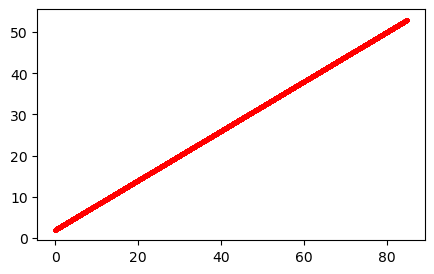

In [56]:
def plotData(X, Y, c = 'b'):
    plt.figure(figsize=(5, 3))
    plt.scatter(X, Y, s = 3, c = c )
    plt.show()

plotData(train_X, train_y, 'r')

Building the Model

In [57]:
class LinearRegression(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias


In [58]:
torch.manual_seed(42)

model_test = LinearRegression()

print("Parameters: ", list(model_test.parameters()))
print("State Dict: ", model_test.state_dict())


Parameters:  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
State Dict:  OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [59]:
# predicting value without training the model

with torch.inference_mode():
    y_pred = model_test(test_X)

# We can do the same this using
# with torch.no_grad():
#     y_pred = model_test(test_X)

y_pred[:10], test_Y[:10]

(tensor([[28.7475],
         [28.7478],
         [28.7482],
         [28.7485],
         [28.7488],
         [28.7492],
         [28.7495],
         [28.7498],
         [28.7502],
         [28.7505]]),
 tensor([[53.0000],
         [53.0006],
         [53.0012],
         [53.0018],
         [53.0024],
         [53.0030],
         [53.0036],
         [53.0042],
         [53.0048],
         [53.0054]]))

Training the Model

In [60]:
torch.manual_seed(42)
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_test.parameters(), lr=0.01)

epochs = 1000

for each_epoch in range(epochs):
    model_test.train()

    y_pred = model_test(train_X)

    loss = lossFn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_test.eval()
    with torch.inference_mode():
        y_pred = model_test(test_X)
        test_loss = lossFn(y_pred, test_Y)
    if each_epoch % 20 == 0:
        print(f" Epoch: {each_epoch}, Train loss is {loss.item()} ans test loss is {test_loss.item()}")
        print([model_test.state_dict()])


 Epoch: 0, Train loss is 13.061718940734863 ans test loss is 13.094616889953613
[OrderedDict([('weights', tensor([0.7617])), ('bias', tensor([0.1388]))])]
 Epoch: 20, Train loss is 9.004914283752441 ans test loss is 21.899574279785156
[OrderedDict([('weights', tensor([0.8566])), ('bias', tensor([0.1597]))])]
 Epoch: 40, Train loss is 6.842517852783203 ans test loss is 26.587886810302734
[OrderedDict([('weights', tensor([0.9072])), ('bias', tensor([0.1751]))])]
 Epoch: 60, Train loss is 5.253997325897217 ans test loss is 30.029743194580078
[OrderedDict([('weights', tensor([0.9442])), ('bias', tensor([0.1883]))])]
 Epoch: 80, Train loss is 3.9681782722473145 ans test loss is 32.814334869384766
[OrderedDict([('weights', tensor([0.9742])), ('bias', tensor([0.2002]))])]
 Epoch: 100, Train loss is 2.8747856616973877 ans test loss is 35.18120574951172
[OrderedDict([('weights', tensor([0.9997])), ('bias', tensor([0.2112]))])]
 Epoch: 120, Train loss is 1.9165793657302856 ans test loss is 37.25

In [61]:
print([model_test.state_dict()])
# with torch.no_grad():
#     y_pred = model_test(test_Y)

# y_pred[:10], test_Y[:10]

[OrderedDict([('weights', tensor([0.6148])), ('bias', tensor([0.6013]))])]


Saving the Model

torch.save() 

torch.load() 

torch.nn.Module.load_state_dict()

In [68]:
from pathlib import Path
modelPath = Path("model.pth")
torch.save(model_test.state_dict(), f=modelPath)

In [74]:
modelLoaded = LinearRegression()
modelLoaded.load_state_dict(torch.load(modelPath))

<All keys matched successfully>

In [75]:
modelLoaded.eval()
with torch.inference_mode():
    ypred = modelLoaded(test_X)

ypred

tensor([[52.8610],
        [52.8616],
        [52.8622],
        ...,
        [62.0815],
        [62.0821],
        [62.0827]])